<a href="https://colab.research.google.com/github/tasawar301/final_year_ocular/blob/main/OCULAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **OCULAR DISEASE RECOGNITION**

### **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import math
warnings.filterwarnings('ignore')

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.stats import ttest_ind
import scipy.stats as stats

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import cv2

upload dataset

In [2]:
#import kagglehub

# Download latest version
#path = kagglehub.dataset_download("andrewmvd/ocular-disease-recognition-odir5k")
#print("Path to dataset files:", path)

In [3]:
path = 'https://raw.githubusercontent.com/tasawar301/final_year_ocular/refs/heads/main/dataset'

In [4]:
data_df = pd.read_csv(path+'/full_df.csv')

In [5]:
print("Size: "+ str(data_df.shape)+"\n\n")
display(data_df.info())
data_df.head()

Size: (6392, 19)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6392 entries, 0 to 6391
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   ID                         6392 non-null   int64 
 1   Patient Age                6392 non-null   int64 
 2   Patient Sex                6392 non-null   object
 3   Left-Fundus                6392 non-null   object
 4   Right-Fundus               6392 non-null   object
 5   Left-Diagnostic Keywords   6392 non-null   object
 6   Right-Diagnostic Keywords  6392 non-null   object
 7   N                          6392 non-null   int64 
 8   D                          6392 non-null   int64 
 9   G                          6392 non-null   int64 
 10  C                          6392 non-null   int64 
 11  A                          6392 non-null   int64 
 12  H                          6392 non-null   int64 
 13  M                          6392 non-null   i

None

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg


## **EXPLORATORY DATA ANALYSIS**

### **1) Numerial data analysis**

In [6]:
data_df.describe()

,ID,Patient Age,N,D,G,C,A,H,M,O
count,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000
mean,2271.150814,57.857947,0.328692,0.332134,0.062109,0.062891,0.049906,0.031758,0.047872,0.248436
std,1417.559018,11.727737,0.469775,0.471016,0.241372,0.242786,0.217768,0.175370,0.213513,0.432139
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,920.750000,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2419.500000,59.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3294.000000,66.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4784.000000,91.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
data_df.describe(include='object')

,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,filepath,labels,target,filename
count,6392,6392,6392,6392,6392,6392,6392,6392,6392
unique,2,3358,3358,196,205,6392,8,8,6392
top,Male,4690_left.jpg,4690_right.jpg,normal fundus,normal fundus,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",4784_left.jpg
freq,3424,2,2,2796,2705,1,2873,2873,1


In [8]:
data_df.isnull().sum()

,0
ID,0
Patient Age,0
Patient Sex,0
Left-Fundus,0
Right-Fundus,0
Left-Diagnostic Keywords,0
Right-Diagnostic Keywords,0
N,0
D,0
G,0


In [9]:
data_df.apply(lambda x: len(x.unique()))

,0
ID,3358
Patient Age,75
Patient Sex,2
Left-Fundus,3358
Right-Fundus,3358
Left-Diagnostic Keywords,196
Right-Diagnostic Keywords,205
N,2
D,2
G,2


In [10]:
data_df.duplicated().sum()

np.int64(0)

In [11]:
data_df['labels'].value_counts()

,count
labels,
['N'],2873
['D'],1608
['O'],708
['C'],293
['G'],284
['A'],266
['M'],232
['H'],128


# **RESEARCH QUESTION ONE:** Study the impact of chronic conditions (hypertension and diabetes) over the ocular disease while studying the image patterns of these 2 diseases and compare it with the age

## **Diabetes analysis**

In [12]:
diabete_df = data_df[data_df['labels']=='[\'D\']']
# display(diabete_df.head())
display(diabete_df.shape)

(1608, 19)

#### **Testing the Difference between the age of Diabetic and non-diabetic patients**

Diabetes Patients Age Statistics:
count    1608.000000
mean       55.699627
std        10.200721
min        17.000000
25%        49.000000
50%        56.000000
75%        63.000000
max        85.000000
Name: Patient Age, dtype: float64

Non-Diabetes Patients Age Statistics:
count    4784.000000
mean       58.583403
std        12.113070
min         1.000000
25%        52.000000
50%        60.000000
75%        66.000000
max        91.000000
Name: Patient Age, dtype: float64 


T-test results: t-statistic=-8.578673730990161, p-value=1.191093099934713e-17



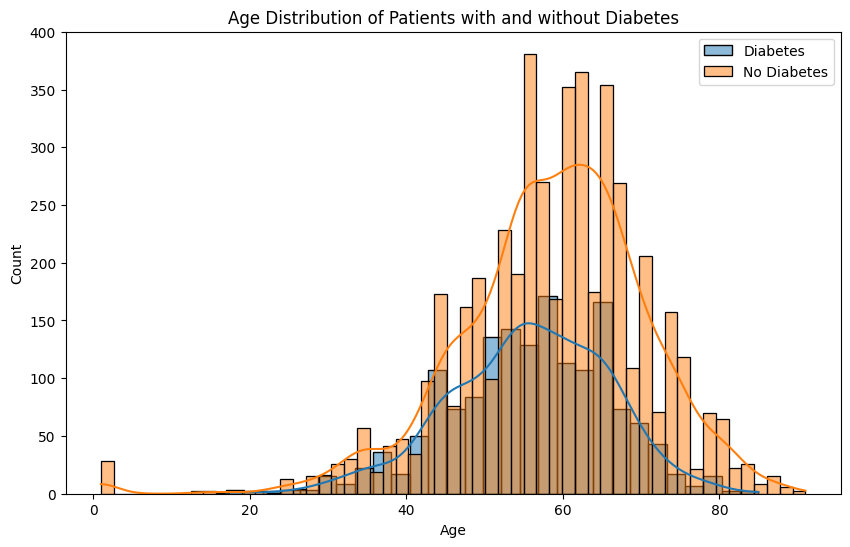

In [13]:
# diabetes_patients = data_df[data_df['labels'] == "['D']"]
non_diabetes_df = data_df[data_df['labels'] != "['D']"]

print("Diabetes Patients Age Statistics:")
print(diabete_df['Patient Age'].describe())

print("\nNon-Diabetes Patients Age Statistics:")
print(non_diabetes_df['Patient Age'].describe(),"\n")

t_statistic, p_value = ttest_ind(diabete_df['Patient Age'], non_diabetes_df['Patient Age'])
print(f"\nT-test results: t-statistic={t_statistic}, p-value={p_value}\n")

plt.figure(figsize=(10, 6))
sns.histplot(diabete_df['Patient Age'], kde=True, label='Diabetes')
sns.histplot(non_diabetes_df['Patient Age'], kde=True, label='No Diabetes')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution of Patients with and without Diabetes')
plt.legend()
plt.show()

The t-test results indicate a statistically significant difference in age between patients diagnosed with diabetes and those without. Let's break down the values:

* **t-statistic = -8.57867:** This value represents the difference between the means of the two groups (diabetes patients and non-diabetes patients) in units of standard error.  A large absolute value of the t-statistic suggests a substantial difference between the group means.  The negative sign indicates that the average age of diabetes patients is *lower* than the average age of non-diabetes patients in this dataset.

* **p-value = 1.191093e-17:** This is a very small number (close to zero).  The p-value represents the probability of observing the obtained difference in means (or a more extreme difference) if there were *actually no difference* in the underlying population means.  A small p-value (typically below 0.05) indicates strong evidence *against* the null hypothesis (that there's no difference in age between the two groups).  In this case, the extremely small p-value provides very strong evidence that the observed age difference is not due to random chance.

**Conclusion:**

The results strongly suggest that there is a statistically significant difference in age between patients with and without diabetes in your dataset. The average age of diabetic patients is notably lower than the average age of non-diabetic patients.  The extremely low p-value reinforces the high confidence in this conclusion.

#### Diabetes in terms of age categories

Now Lets define the age categories for diabetes class, to monitor how the age are diseases features are related


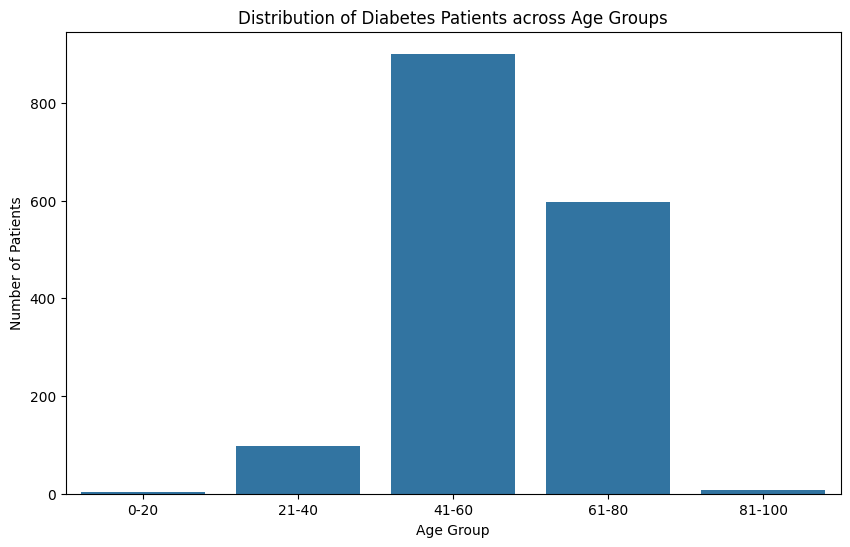

In [14]:
# Dividing the diabetes data into different ages groups
bins = [0, 20, 40, 60, 80, 100]
labels = ['0-20', '21-40', '41-60', '61-80', '81-100']
diabete_df['Age_Group'] = pd.cut(diabete_df['Patient Age'], bins=bins, labels=labels, right=False)

# age_group_counts = diabete_df['Age_Group'].value_counts().sort_index()
# print(age_group_counts)

plt.figure(figsize=(10, 6))
sns.countplot(x='Age_Group', data=diabete_df)
plt.title('Distribution of Diabetes Patients across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Number of Patients')
plt.show()


From Above plot, it can be seen the age group 41-60 have majority of diabetes cases followed by the 61-80 group. and around 100+ cases are reported belonging to the age group of 21-40. beside these 3 groups there are rare cases which fall in other category. although they are very few, but they still be considered for observing the pattern of the diabetes impact on fundus images.

In [15]:
keywords = ['mild nonproliferative retinopathy', 'moderate non proliferative retinopathy',
            'severe proliferative diabetic retinopathy', 'proliferative', 'diabetic retinopathy','normal fundus']

def filter_keywords(text):
  if isinstance(text, str):
    for keyword in keywords:
      if keyword in text.lower():
        return keyword
  return "non-diabetic symptoms"


diabete_df['Left_diabete_stage'] = diabete_df['Left-Diagnostic Keywords'].apply(filter_keywords)
diabete_df['Right_diabete_stage'] = diabete_df['Right-Diagnostic Keywords'].apply(filter_keywords)


In [16]:
diabete_stage_df = diabete_df[['ID','Patient Age','Patient Sex','Age_Group','Left_diabete_stage','Right_diabete_stage']]

In [17]:
diabete_stage_df

,ID,Patient Age,Patient Sex,Age_Group,Left_diabete_stage,Right_diabete_stage
2,2,42,Male,41-60,moderate non proliferative retinopathy,moderate non proliferative retinopathy
3,4,53,Male,41-60,non-diabetic symptoms,mild nonproliferative retinopathy
4,5,50,Female,41-60,moderate non proliferative retinopathy,moderate non proliferative retinopathy
5,6,60,Male,61-80,non-diabetic symptoms,moderate non proliferative retinopathy
6,7,60,Female,61-80,non-diabetic symptoms,mild nonproliferative retinopathy
...,...,...,...,...,...,...
6385,4682,45,Male,41-60,mild nonproliferative retinopathy,moderate non proliferative retinopathy
6387,4686,63,Male,61-80,proliferative,proliferative
6388,4688,42,Male,41-60,moderate non proliferative retinopathy,moderate non proliferative retinopathy
6389,4689,54,Male,41-60,mild nonproliferative retinopathy,normal fundus


Combine the diabete stages such that if the patient have severe in left eye and mild in right eye the combine column will hold the value of severe. in short the more critical diagonises are given piority while generating the comhine diabetes stage

In [18]:
def combine_diabete_stages(row):
  left_stage = row['Left_diabete_stage']
  right_stage = row['Right_diabete_stage']

  if 'severe' in str(left_stage).lower() or 'severe' in str(right_stage).lower():
    return 'severe'
  elif 'moderate' in str(left_stage).lower() or 'moderate' in str(right_stage).lower():
    return 'moderate'
  elif 'mild' in str(left_stage).lower() or 'mild' in str(right_stage).lower():
    return 'mild'
  elif 'proliferative' in str(left_stage).lower() or 'proliferative' in str(right_stage).lower():
    return 'proliferative'
  elif 'diabetic retinopathy' in str(left_stage).lower() or 'diabetic retinopathy' in str(right_stage).lower():
    return 'diabetic'
  elif 'normal' in str(left_stage).lower() or 'normal' in str(right_stage).lower():
    return 'normal'
  else:
    return 'non-diabetic symptoms'

diabete_stage_df['Combined_diabete_stage'] = diabete_stage_df.apply(combine_diabete_stages, axis=1)
diabete_stage_df


,ID,Patient Age,Patient Sex,Age_Group,Left_diabete_stage,Right_diabete_stage,Combined_diabete_stage
2,2,42,Male,41-60,moderate non proliferative retinopathy,moderate non proliferative retinopathy,moderate
3,4,53,Male,41-60,non-diabetic symptoms,mild nonproliferative retinopathy,mild
4,5,50,Female,41-60,moderate non proliferative retinopathy,moderate non proliferative retinopathy,moderate
5,6,60,Male,61-80,non-diabetic symptoms,moderate non proliferative retinopathy,moderate
6,7,60,Female,61-80,non-diabetic symptoms,mild nonproliferative retinopathy,mild
...,...,...,...,...,...,...,...
6385,4682,45,Male,41-60,mild nonproliferative retinopathy,moderate non proliferative retinopathy,moderate
6387,4686,63,Male,61-80,proliferative,proliferative,proliferative
6388,4688,42,Male,41-60,moderate non proliferative retinopathy,moderate non proliferative retinopathy,moderate
6389,4689,54,Male,41-60,mild nonproliferative retinopathy,normal fundus,mild


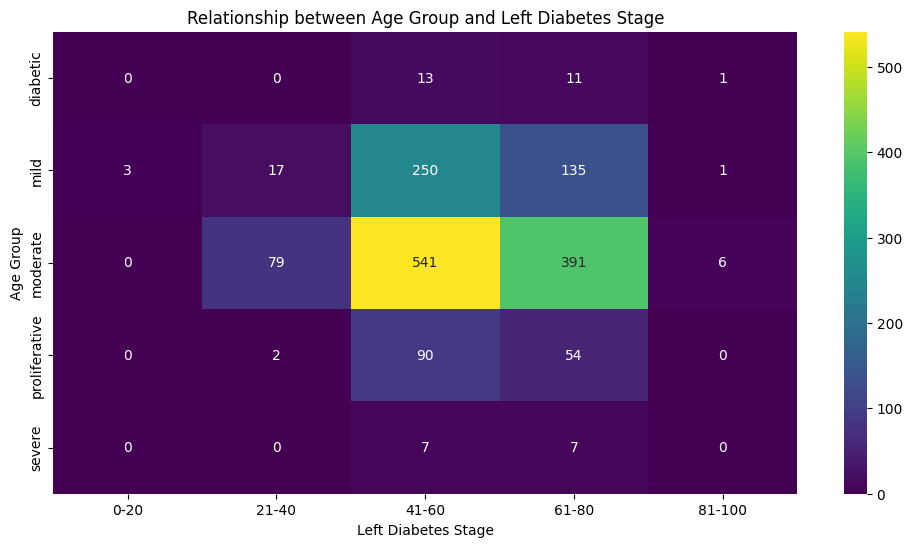

Chi-square statistic: 39.08075165556195
P-value: 0.0010588038543547227
Reject the null hypothesis: There is a significant relationship between Age group and Diabete Stages.


In [19]:
age_stage_crosstab = pd.crosstab(diabete_stage_df['Combined_diabete_stage'], diabete_stage_df['Age_Group'])
# display(age_stage_crosstab)

# Visualize the relationship using a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(age_stage_crosstab, annot=True, fmt='d', cmap='viridis')
plt.title('Relationship between Age Group and Left Diabetes Stage')
plt.xlabel('Left Diabetes Stage')
plt.ylabel('Age Group')
plt.show()


# Perform Chi-Square test
chi2, p, dof, expected = stats.chi2_contingency(age_stage_crosstab)
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")

# Interpretation
if p < 0.05:
    print("Reject the null hypothesis: There is a significant relationship between Age group and Diabete Stages.")
else:
    print("Fail to reject the null hypothesis: No significant relationship found.")

#### **Conclusion**
A Significant relationship is reported by chi-square test between age group and diabete stages.
Crosstab shows that the early age groups doesnot have severe and or proliferative(critical) cases, all of the severe and proliferative cases are reported in the later age groups. where as the mild cases are even reported in the very age group (i.e., 0-20 group). and the Moderate cases stages from the 21-40 age group and increases in the later groups.

#### **Fundus images of Diabete stages over age group**
Observing these diabetes stages over the age category

In [43]:
import os
def trim_and_replace(filepath):
    filename = os.path.basename(filepath)
    new_filepath = os.path.join("/ODIR-5K/ODIR-5K/Training Images", filename)
    return new_filepath

In [44]:
import requests
import io
from PIL import Image

def load_image_from_github(image_url):
    response = requests.get(image_url, stream=True)
    response.raise_for_status()
    image = Image.open(io.BytesIO(response.content))
    return image

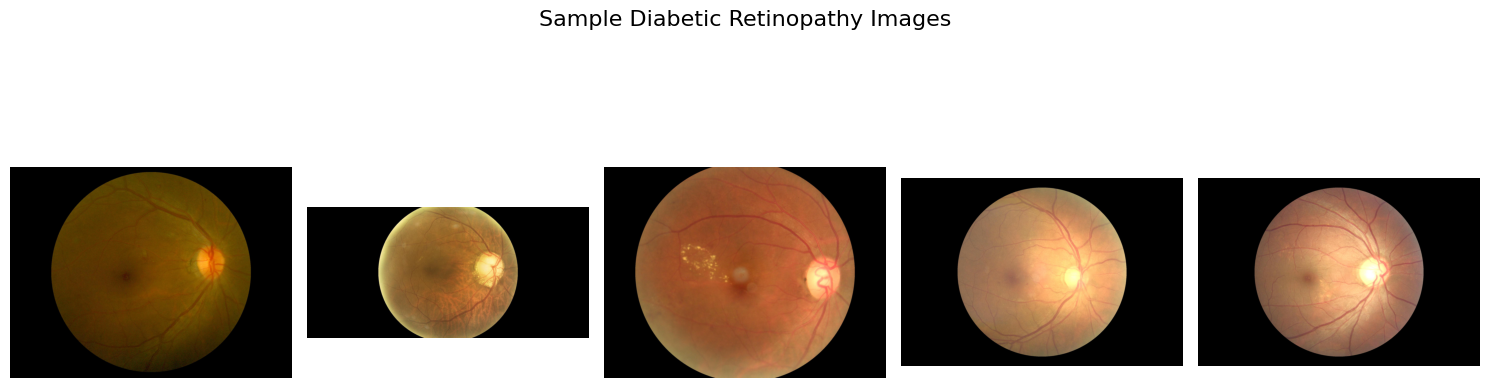

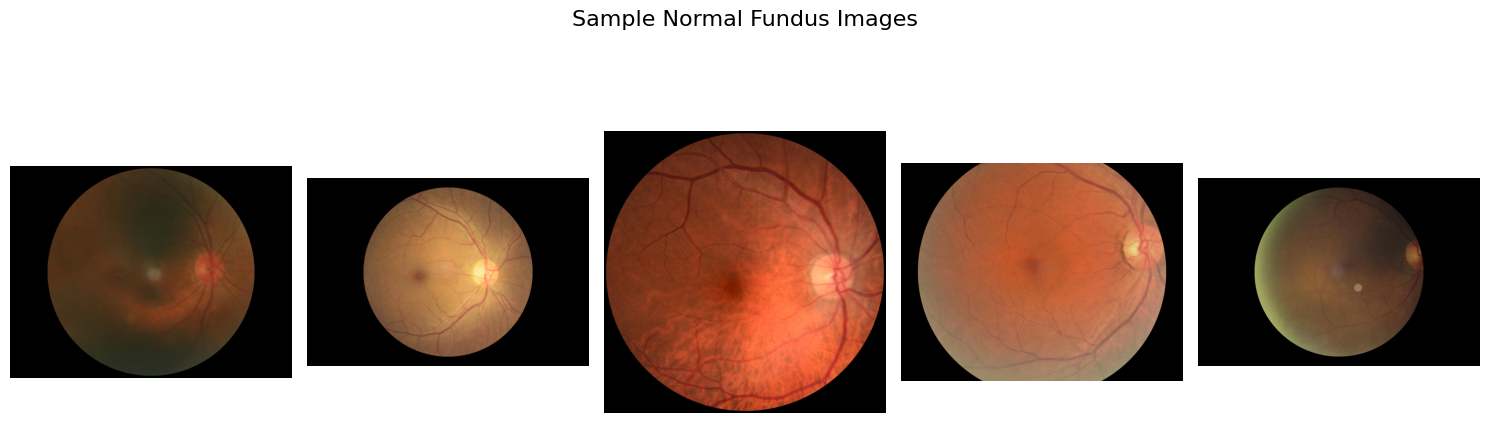

In [45]:
def display_image_comparison(df, title):
    image_paths = []
    for index, row in df.iterrows():
        image_path = path + trim_and_replace(row['filepath'])
        image_paths.append(image_path)

    fig, axes = plt.subplots(1, 5, figsize=(15, 5))
    fig.suptitle(title, fontsize=16)

    for i in range(5):
      try:
          img = load_image_from_github(image_paths[i])
          axes[i].imshow(img)
          axes[i].axis('off')
      except FileNotFoundError:
          print(f"Image not found: {image_paths[i]}")
      except IndexError:
          pass
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


# Display a few images for diabetes patients
display_image_comparison(diabete_df.head(), "Sample Diabetic Retinopathy Images")

# Display a few images for normal patients
display_image_comparison(data_df[data_df['labels']=="['N']"].head(), "Sample Normal Fundus Images")


In [46]:
bb = diabete_df[diabete_df['Left_diabete_stage'].isin(['moderate non proliferative retinopathy',
       'mild nonproliferative retinopathy',
       'diabetic retinopathy', 'proliferative',
       'severe proliferative diabetic retinopathy'])]

In [47]:
import torch
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image

# Load Pretrained Model (Feature Extractor)
model = models.resnet50(pretrained=True)
model = torch.nn.Sequential(*list(model.children())[:-2])  # Keep feature maps
model.eval()

# Define Image Preprocessing
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

def extract_and_visualize_features(image_path):
    img = Image.open(image_path).convert("RGB")
    img_tensor = transform(img).unsqueeze(0)  # Add batch dimension

    # Extract Features
    with torch.no_grad():
        features = model(img_tensor)

    # Convert Features to Heatmap
    feature_map = features.squeeze().numpy()  # Remove batch dimension
    feature_map = np.mean(feature_map, axis=0)  # Average over channels
    feature_map = cv2.resize(feature_map, (img.width, img.height))  # Resize to match original image size

    # Normalize heatmap for visualization
    feature_map = (feature_map - feature_map.min()) / (feature_map.max() - feature_map.min())

    # Convert heatmap to color
    heatmap = cv2.applyColorMap(np.uint8(255 * feature_map), cv2.COLORMAP_JET)
    heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)  # Convert to RGB

    # Blend heatmap with original image
    img_np = np.array(img)
    overlay = cv2.addWeighted(img_np, 0.6, heatmap, 0.4, 0)

    # Display Original & Highlighted Image
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))

    ax[0].imshow(img)
    ax[0].axis("off")
    ax[0].set_title("Original Image")

    ax[1].imshow(overlay)
    ax[1].axis("off")
    ax[1].set_title("Feature Heatmap Overlay")

    plt.show()


In [49]:
for age in bb['Age_Group'].unique():
  print("\n\nAge Group: "+age)
  aa = bb[bb['Age_Group']==age].groupby('Left_diabete_stage')['filepath'].first().reset_index()
  for index, row in aa.iterrows():
    print(f"Diabetes Stage: {row['Left_diabete_stage']}")
    extract_and_visualize_features(path+trim_and_replace(row['filepath']))



Age Group: 41-60
Diabetes Stage: diabetic retinopathy


FileNotFoundError: [Errno 2] No such file or directory: 'https://raw.githubusercontent.com/tasawar301/final_year_ocular/refs/heads/main/dataset/ODIR-5K/ODIR-5K/Training Images/67_right.jpg'

## **Hypertension analysis**

In [27]:
hypertension_df = data_df[data_df['labels']=='[\'H\']']
display(hypertension_df.head())
display(hypertension_df.shape)

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
19,23,47,Male,23_left.jpg,23_right.jpg,hypertensive retinopathy,hypertensive retinopathy,0,0,0,0,0,1,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['H'],"[0, 0, 0, 0, 0, 1, 0, 0]",23_right.jpg
23,28,63,Female,28_left.jpg,28_right.jpg,hypertensive retinopathy,hypertensive retinopathy,0,0,0,0,0,1,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['H'],"[0, 0, 0, 0, 0, 1, 0, 0]",28_right.jpg
26,32,64,Female,32_left.jpg,32_right.jpg,hypertensive retinopathy,hypertensive retinopathy,0,0,0,0,0,1,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['H'],"[0, 0, 0, 0, 0, 1, 0, 0]",32_right.jpg
36,45,54,Male,45_left.jpg,45_right.jpg,hypertensive retinopathy,hypertensive retinopathy,0,0,0,0,0,1,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['H'],"[0, 0, 0, 0, 0, 1, 0, 0]",45_right.jpg
51,62,50,Male,62_left.jpg,62_right.jpg,hypertensive retinopathy,hypertensive retinopathy,0,0,0,0,0,1,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['H'],"[0, 0, 0, 0, 0, 1, 0, 0]",62_right.jpg


(128, 19)

#### **Testing the Difference between the age of Hypertension and non-hypertension patients**

Hypertension Patients Age Statistics:
count    128.000000
mean      57.046875
std        7.519905
min       37.000000
25%       52.000000
50%       58.000000
75%       63.000000
max       70.000000
Name: Patient Age, dtype: float64

Non-hypertension Patients Age Statistics:
count    6264.000000
mean       57.874521
std        11.797897
min         1.000000
25%        51.000000
50%        59.000000
75%        66.000000
max        91.000000
Name: Patient Age, dtype: float64 


T-test results: t-statistic=-0.790369458628053, p-value=0.42934136343078255



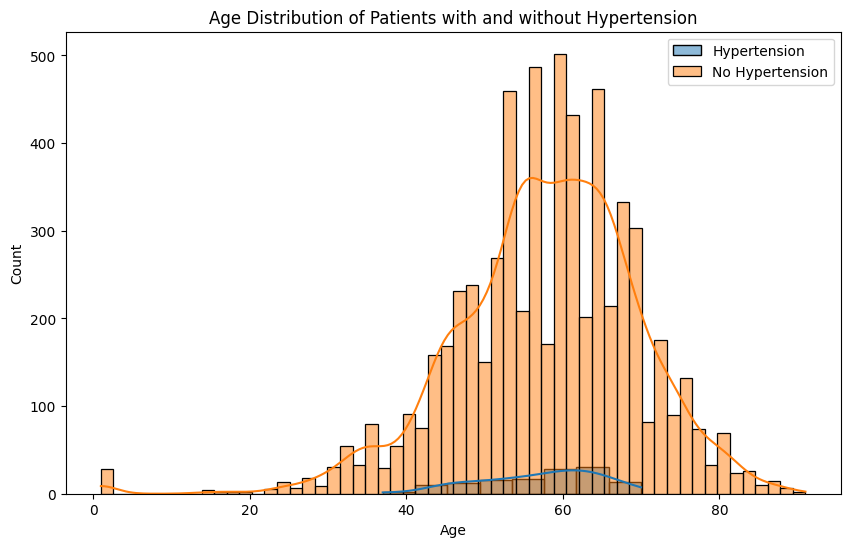

In [28]:
non_hypertension_df = data_df[data_df['labels'] != "['H']"]

print("Hypertension Patients Age Statistics:")
print(hypertension_df['Patient Age'].describe())

print("\nNon-hypertension Patients Age Statistics:")
print(non_hypertension_df['Patient Age'].describe(),"\n")

t_statistic, p_value = ttest_ind(hypertension_df['Patient Age'], non_hypertension_df['Patient Age'])
print(f"\nT-test results: t-statistic={t_statistic}, p-value={p_value}\n")

plt.figure(figsize=(10, 6))
sns.histplot(hypertension_df['Patient Age'], kde=True, label='Hypertension')
sns.histplot(non_hypertension_df['Patient Age'], kde=True, label='No Hypertension')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution of Patients with and without Hypertension')
plt.legend()
plt.show()

The t-test results indicate no statistically significant difference in age between patients diagnosed with hypertension and those without. Let's break down the values:
Your t-test results indicate the following:

- **t-statistic = -0.79:** This measures the difference between two group means relative to the variability within the groups. A t-value close to zero suggests little difference between the groups.

- **p-value = 0.429:** This tells us the probability of observing the data assuming the null hypothesis (no difference between groups) is true. A common significance threshold is 0.05. Since 0.429 is much greater than 0.05, we fail to reject the null hypothesis.

**Conclusion:**
the test results strongly suggest that there is no statistically significant difference the age between patient with and without hypertension.
the Average of both groups are almost same.
The observed difference (if any) is likely due to random chance rather than a real effect.



#### Hypertension in terms of age categories

Now Lets define the age categories for hypertension class, to monitor how the age and diseases features are related


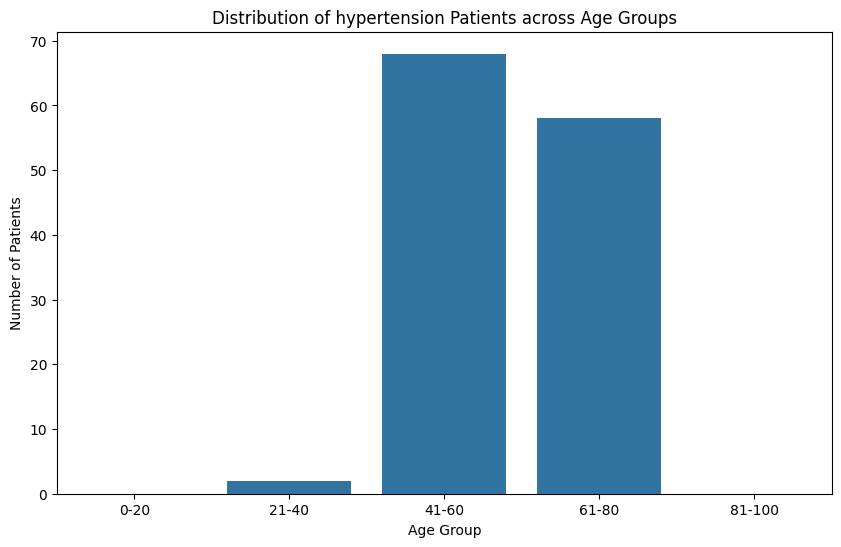

In [29]:
bins = [0, 20, 40, 60, 80, 100]
labels = ['0-20', '21-40', '41-60', '61-80', '81-100']
hypertension_df['Age_Group'] = pd.cut(hypertension_df['Patient Age'], bins=bins, labels=labels, right=False)

# age_group_counts = hypertension_df['Age_Group'].value_counts().sort_index()
# print(age_group_counts)

plt.figure(figsize=(10, 6))
sns.countplot(x='Age_Group', data=hypertension_df)
plt.title('Distribution of hypertension Patients across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Number of Patients')
plt.show()


From Above plot, it can be seen the age group 41-60 have majority of diabetes cases followed by the 61-80 group. and few cases are reported belonging to the age group of 21-40. beside these 3 groups there are zero cases which fall in other category.

#### **Compare the Severity of Hypertension over the Age Category**

In [30]:
hypertension_df['Right-Diagnostic Keywords'].unique()

array(['hypertensive retinopathy',
       'hypertensive retinopathy，macular epiretinal membrane',
       'hypertensive retinopathy，cataract',
       'hypertensive retinopathy，suspected glaucoma',
       'hypertensive retinopathy，mild nonproliferative retinopathy',
       'hypertensive retinopathy，branch retinal vein occlusion',
       'hypertensive retinopathy，suspected diabetic retinopathy',
       'hypertensive retinopathy，moderate non proliferative retinopathy',
       'hypertensive retinopathy，maculopathy',
       'hypertensive retinopathy，branch retinal vein occlusion，vitreous opacity',
       'hypertensive retinopathy，diabetic retinopathy',
       'hypertensive retinopathy，age-related macular degeneration',
       'wet age-related macular degeneration，hypertensive retinopathy',
       'old branch retinal vein occlusion',
       'proliferative diabetic retinopathy，hypertensive retinopathy',
       'glaucoma，hypertensive retinopathy',
       'dry age-related macular degeneration',


From the above diagnoses, it is observe that there is not different stages of hypertension are present, i.e, there is only one sympton noted that say hypertension retinopathy.

Since there is not stages is reported, we cannot further explore the hypertension in terms of stages.


#### **Conclusion**
It have been observe that there is no significant impact of ages over the hypertension. although it is a chronic disease, but it doesnot possess stages to further study them.

There is possibility that this conclusion is highly baised due to the lack of hypertension data. the normal cases above 2000 whereas the hypertension cases are below 200.

#### **Fundus images of Hypertension**
Still we can Observing the features of hypertension from the fundus images

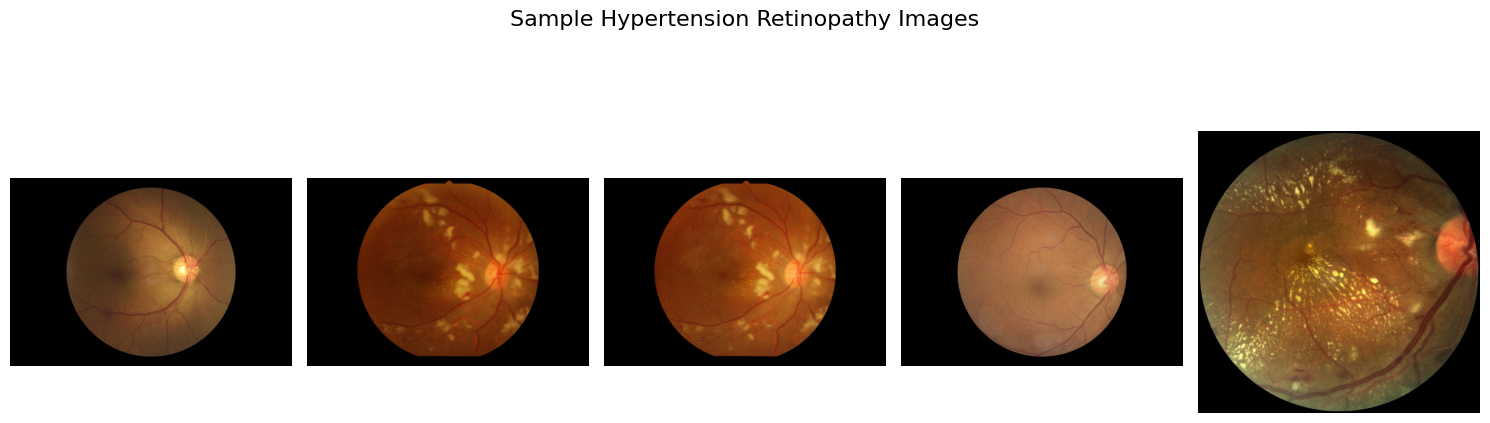

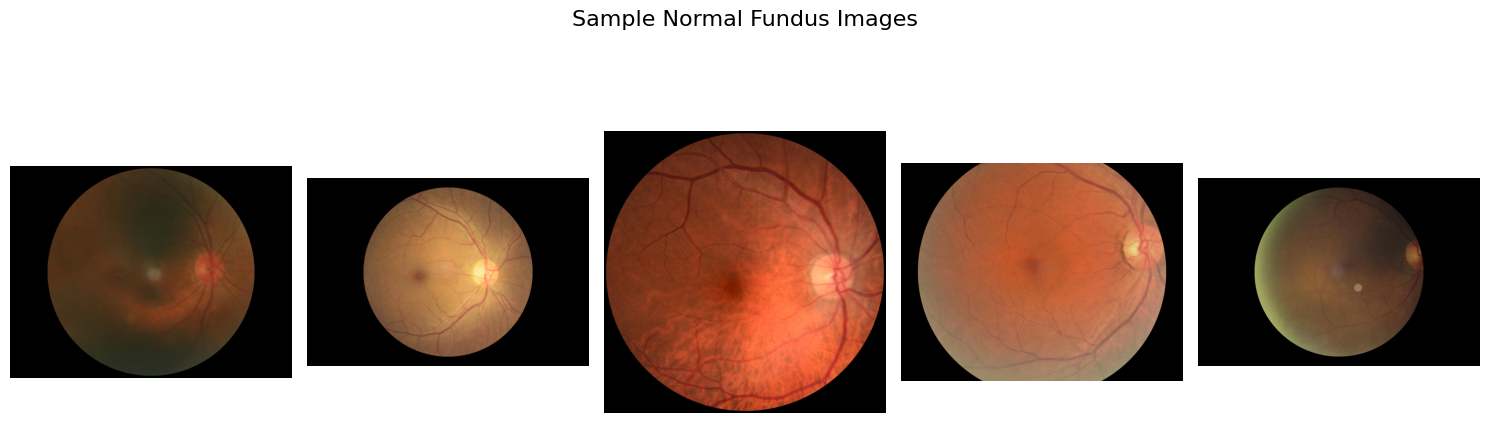

In [31]:
# Display a few images for Hypertension patients
display_image_comparison(hypertension_df.head(), "Sample Hypertension Retinopathy Images")

# Display a few images for normal patients
display_image_comparison(data_df[data_df['labels']=="['N']"].head(), "Sample Normal Fundus Images")



In [34]:
for age in hypertension_df['Age_Group'].unique():
  print("\n\nAge Group: "+age)
  aa = hypertension_df[hypertension_df['Age_Group']==age].iloc[0:2]
  for index, row in aa.iterrows():
    # print(f"Hypertension")
    extract_and_visualize_features(path+trim_and_replace(row['filepath']))



Age Group: 41-60


FileNotFoundError: [Errno 2] No such file or directory: 'https://raw.githubusercontent.com/tasawar301/final_year_ocular/refs/heads/main/dataset/ODIR-5K/ODIR-5K/Training Images/23_right.jpg'

# **RESEARCH QUESTION TWO:** Study the contagious nature of each disease by monitoring the association between the left and right eye disease.

In [ ]:
# We'll create a contingency table to analyze the association between diseases in the left and right eyes.
disease_df = data_df[data_df['labels'] != "['N']"]
contingency_table = pd.crosstab(disease_df['Left-Diagnostic Keywords'], disease_df['Right-Diagnostic Keywords'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print("Chi-square statistic:", chi2)
print("P-value:", p)

if p < 0.05:
  print("There is a statistically significant association between diseases in the left and right eyes.")
else:
  print("There is no statistically significant association between diseases in the left and right eyes.")